In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength" , "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols) #names = cols means we assign column names to this dataset
                                               #read_csv outputs the given dataset

In [ ]:
df.head() #First five names

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

As you can see above there are a lot of elemens in our dataet, these are called datapoints, samples or examples. On the top column names are calles "FEATURES", there are 10 features per each sample, and there are pre-defined "LABELS" then thats why this model called SUPERVISED = pre-defined labels.

In [ ]:
df.tail()

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h

In [ ]:
df["class"].unique()  #Output unique values of requested column, it is better if there are couple of unique values

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int) #converts the string into integers 0 and 1 for computer to better understand

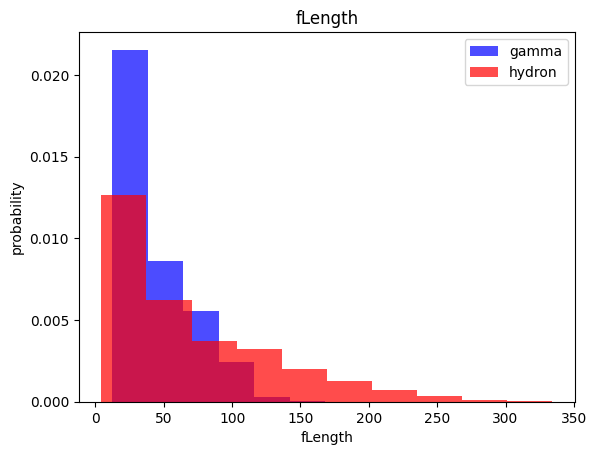

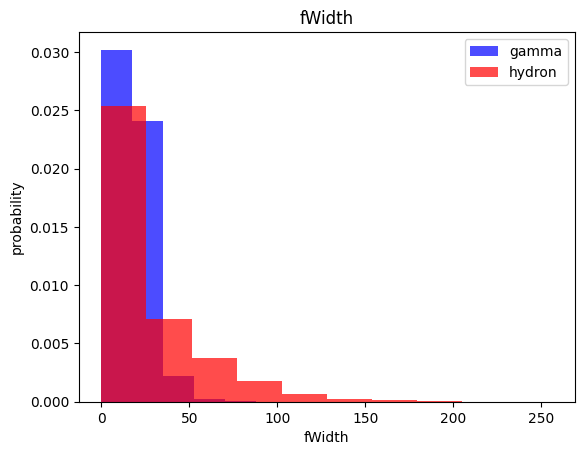

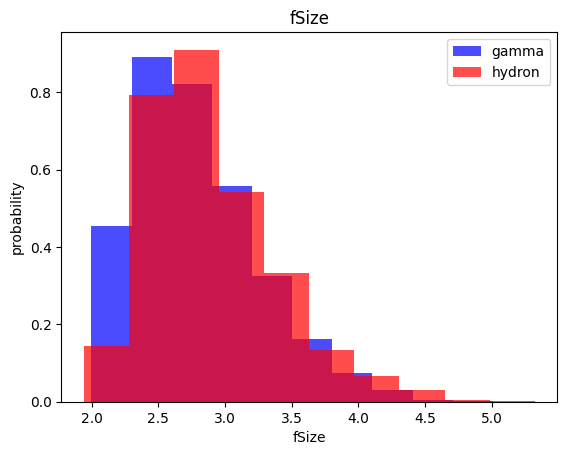

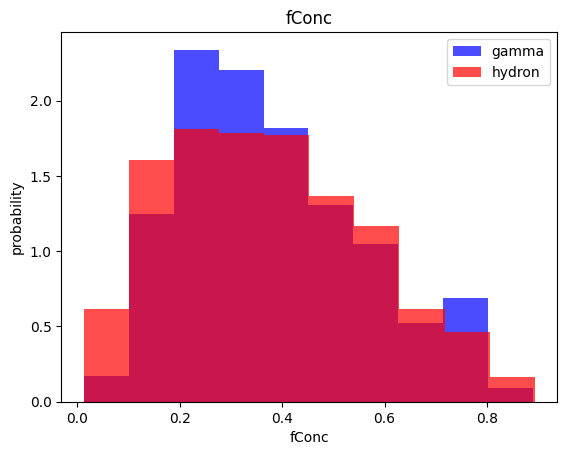

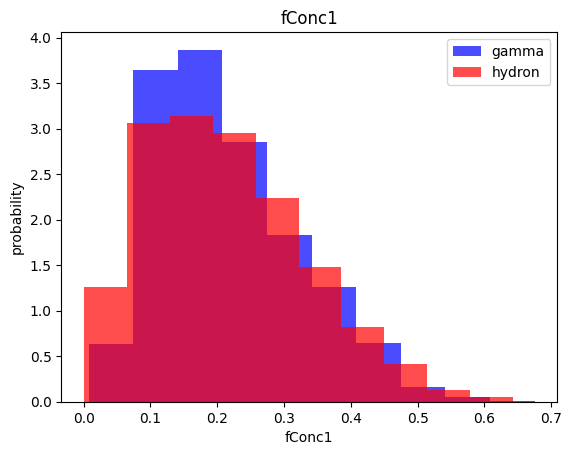

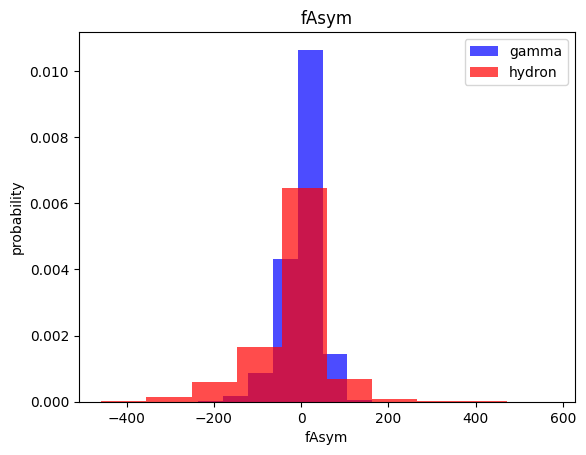

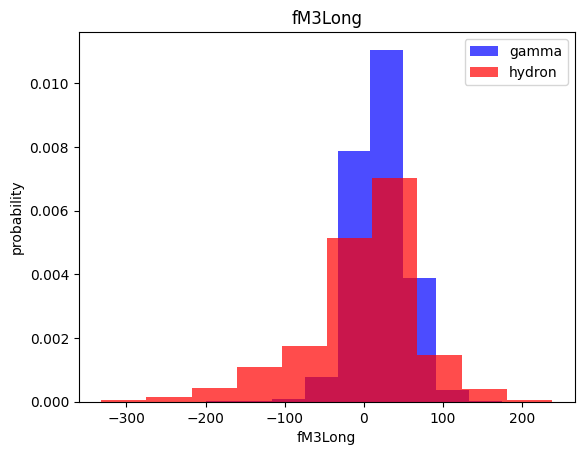

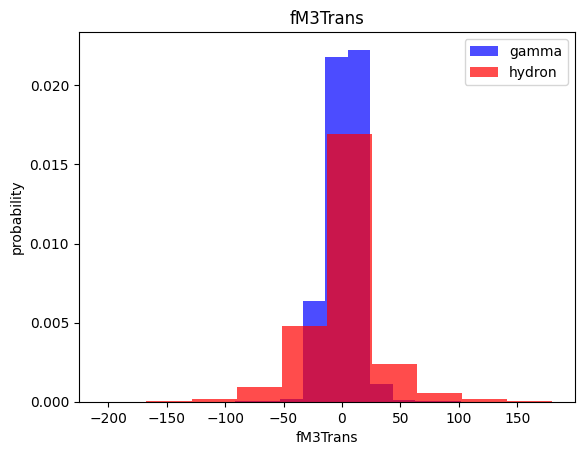

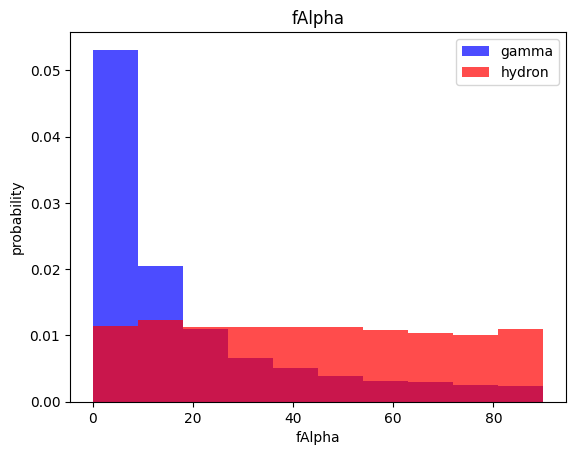

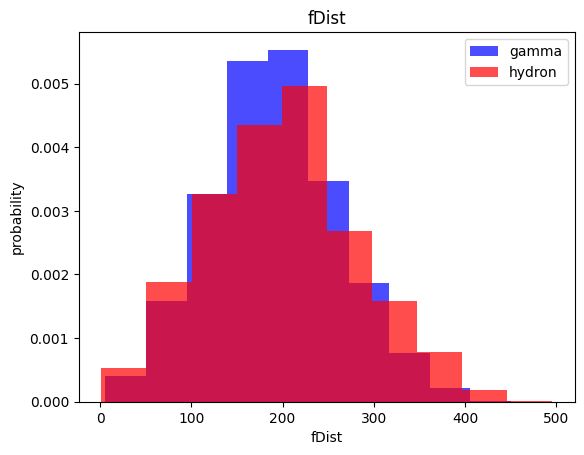

In [ ]:
#Histogram
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color = "red", label = "hydron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, Validaton and Test datasets

In [ ]:
train, val, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

#Scaling the dataset

In [ ]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1,1)))) #hstack stands for horizontal stacking of two matrices
                                       #however our y is only a vector not a matrix, we have to reshape it
                                       #np.hstack and np.reshape
  return data, x, y

#We want to check the length of training data, and especially where the label 1 and 0

In [ ]:
print(len(train[train["class"] == 1])) #gammas
print(len(train[train["class"] == 0]))

7408
4004


#As you can see above the data is unbalanced, so we have to increase the number of 0s to better match

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample = True)
val, x_val, y_val = scale_dataset(val, oversample = False)
test, x_test, y_test = scale_dataset(test, oversample = False)

In [ ]:
len(train)

14816

In [ ]:
sum(y_train == 1)

7408

In [ ]:
sum(y_train == 0) #Now the number of 1s and 0s are exactly the same

7408

#Now we have a data properly formatted, and next we have to define our model

#Implementation of K-Nearest Neighbor algorithm for classification
**General idea:** calculate the Euclidean distance between the datapoint and the neighbors, and take the label of the closest majority.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= knn_model.predict(x_test)
print(y_pred)
print(y_test)

[0 0 1 ... 1 0 1]
[0 0 1 ... 1 0 1]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1312
           1       0.86      0.86      0.86      2492

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Implementation of Naive Bayes algorithm for Classification
**General Idea:** calculate the probability on a given condition. P()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1312
           1       0.74      0.90      0.81      2492

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#Implementation of Logistic Regression algorithm for classification
**General idea:** to draw a sigmoidal line

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lor_model = LogisticRegression()
lor_model = lor_model.fit(x_train, y_train)

In [ ]:
y_pred = lor_model.predict(x_test)
print(y_pred)
print(y_test)

[0 0 1 ... 0 0 1]
[0 0 1 ... 1 0 1]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1312
           1       0.85      0.81      0.83      2492

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#Implemetation of Support Vector Machine algortihm for classification
**General idea:**to find a line(2D) or a plane(3D) that divides the classes. The most important thing about SVM lines or planes is MARGIN. The wider a margin the better a classification. The datapoints that help us to find the best line, (normally datapoints that lie on the margin) are called SUPPORT VECTORS. SVM are very sensitive to outliers.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model = svc_model.fit(x_train, y_train)

In [ ]:
y_pred = svc_model.predict(x_test)
print(y_pred)
print(y_test)

[0 0 1 ... 1 0 1]
[0 0 1 ... 1 0 1]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1312
           1       0.89      0.90      0.89      2492

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Implementation of Neural Network for classification

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label= 'loss')
  plt.plot(history.history['val_loss'], label= 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label= 'accuracy')
  plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])

  history = nn_model.fit(
    x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
)
  return nn_model, history


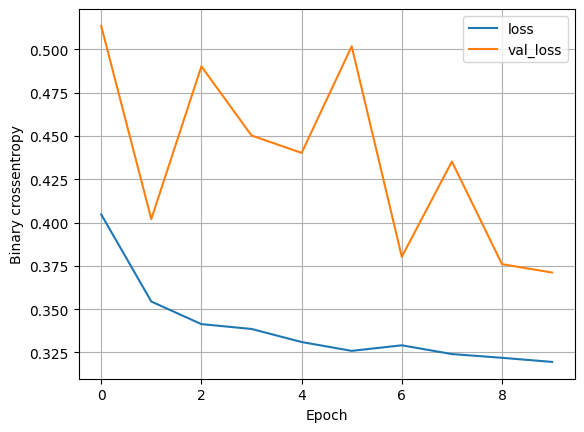

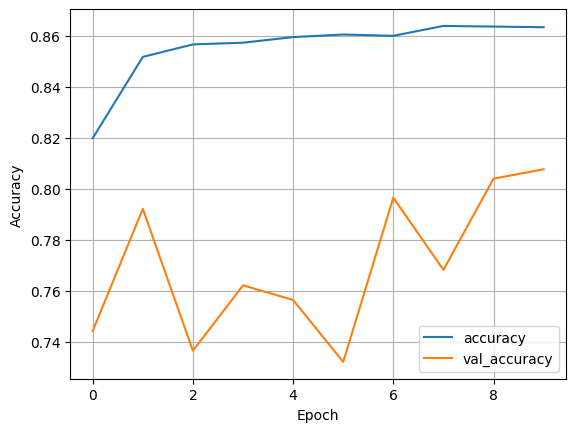

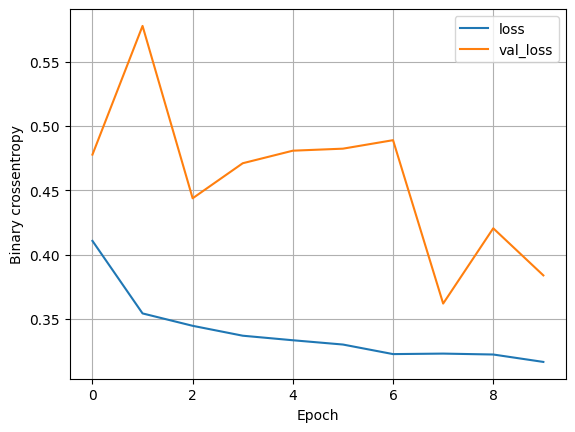

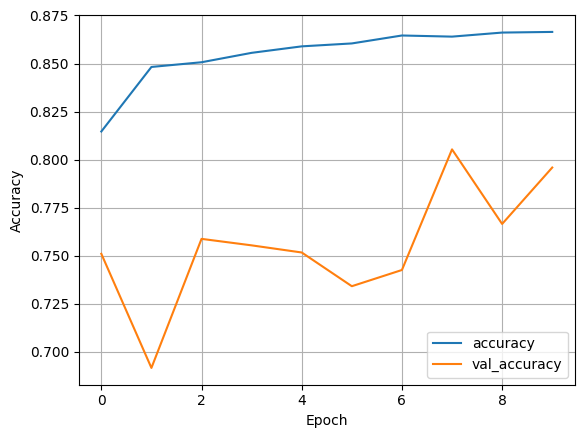

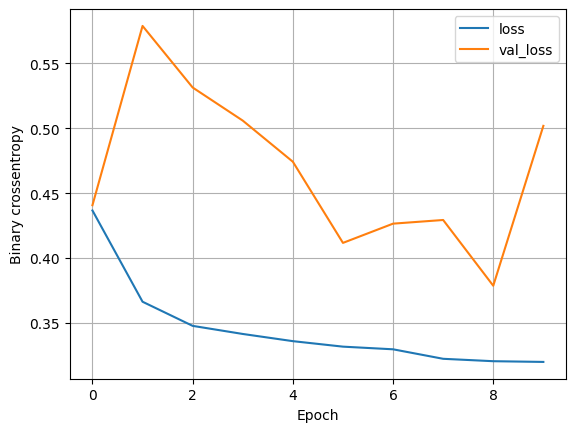

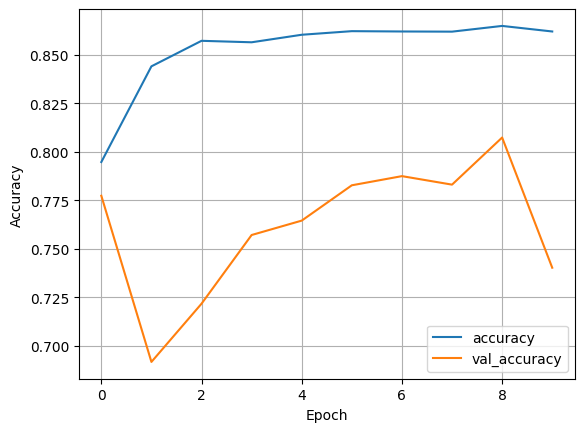

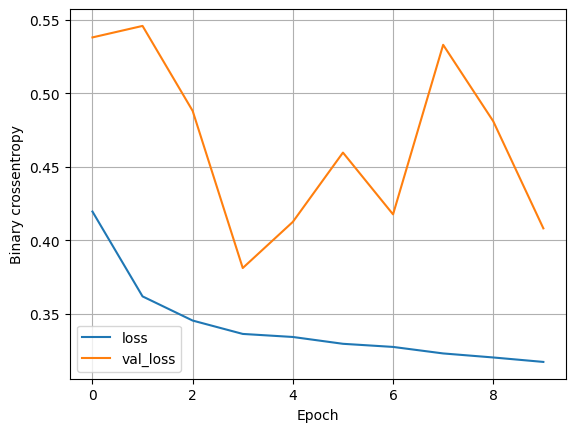

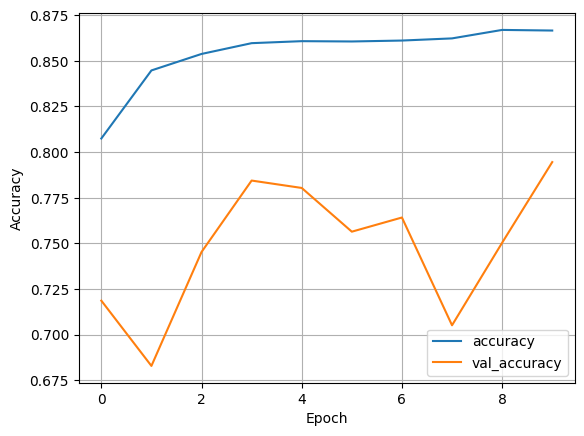

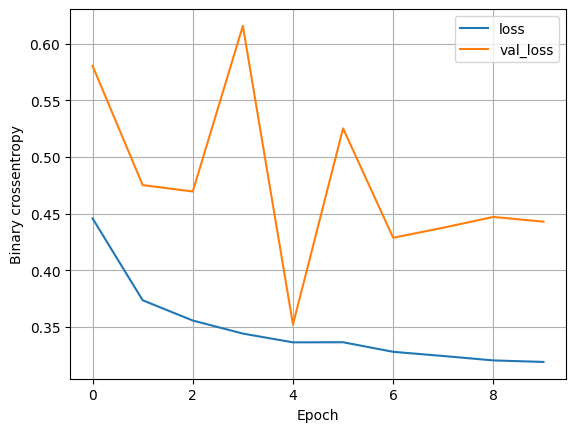

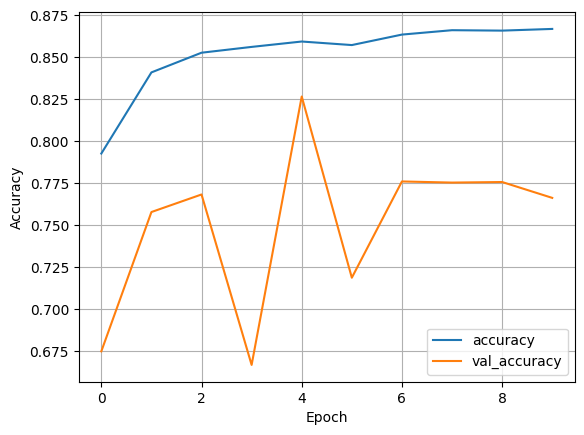

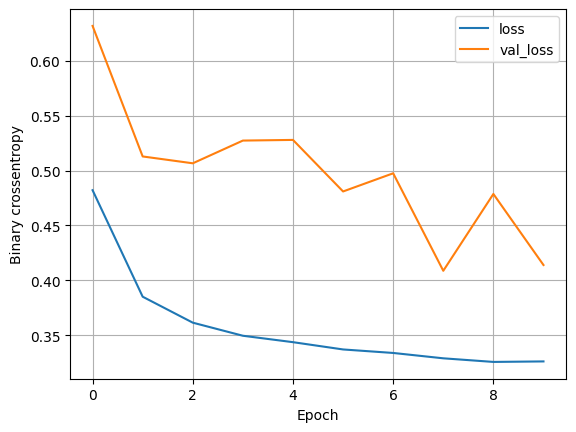

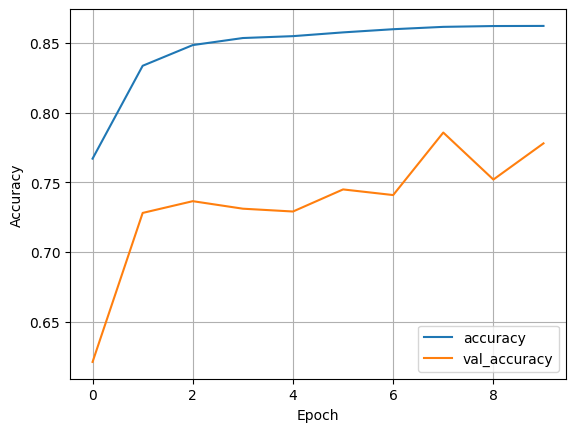

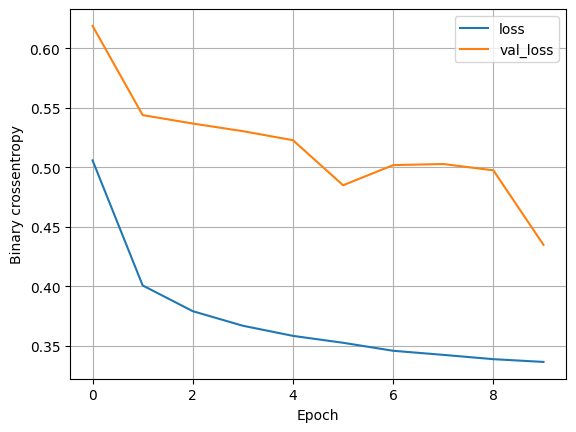

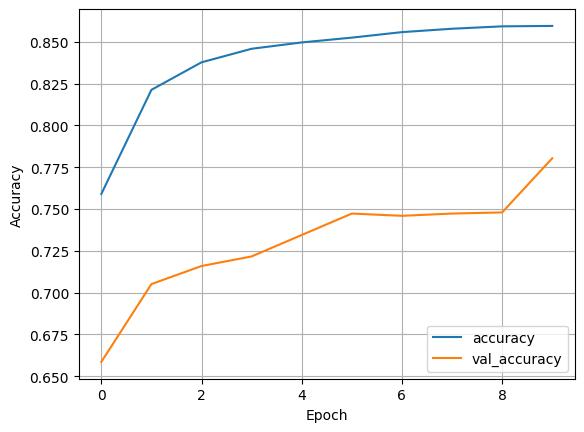

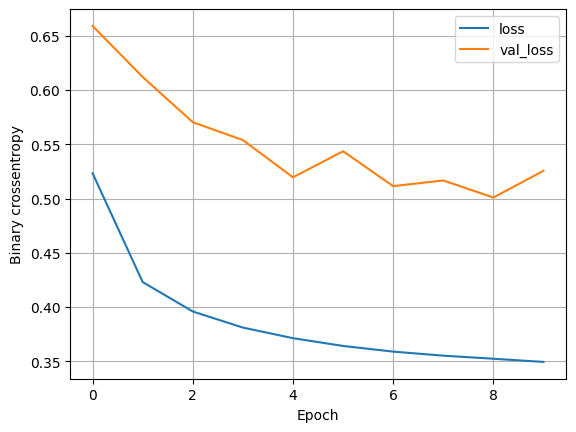

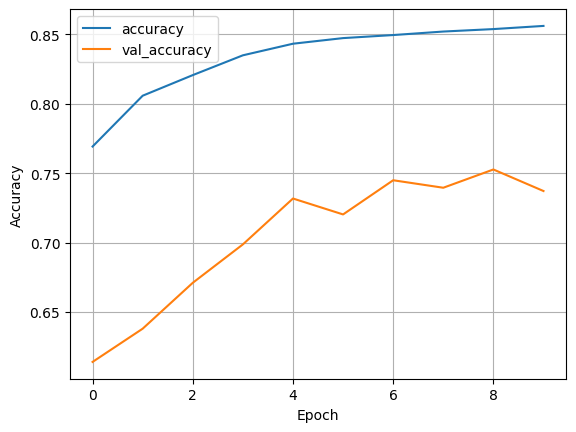

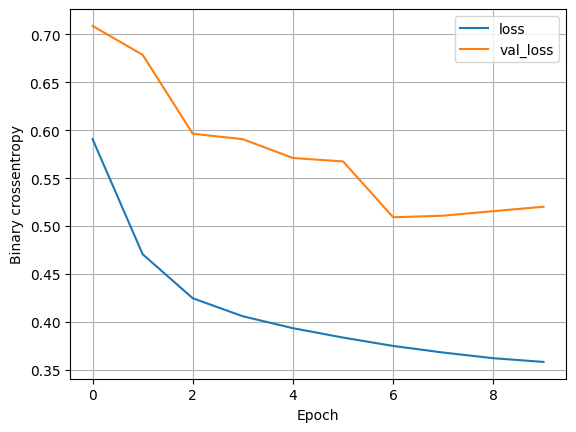

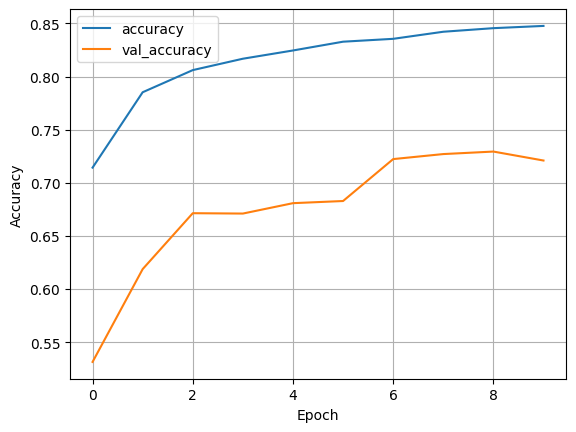

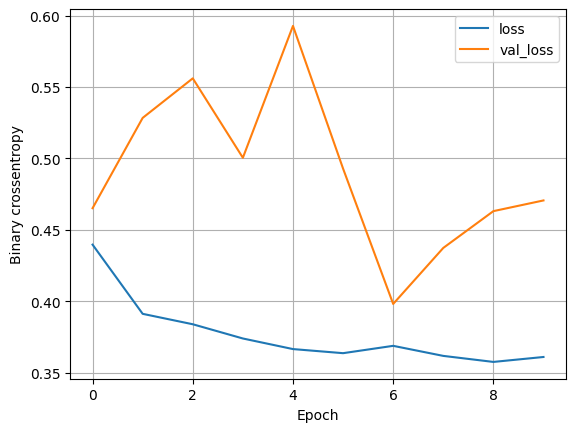

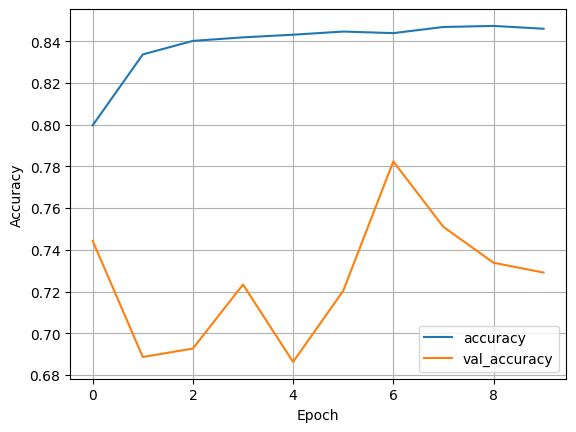

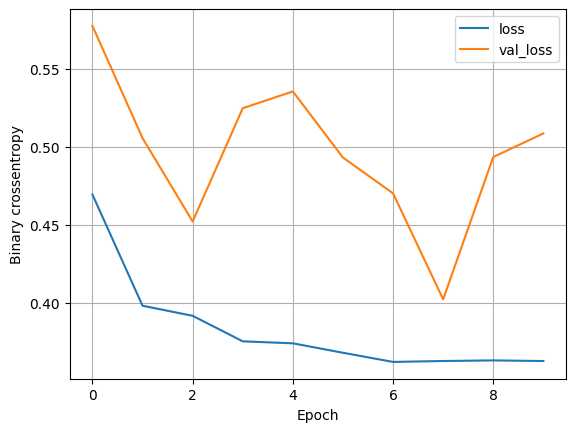

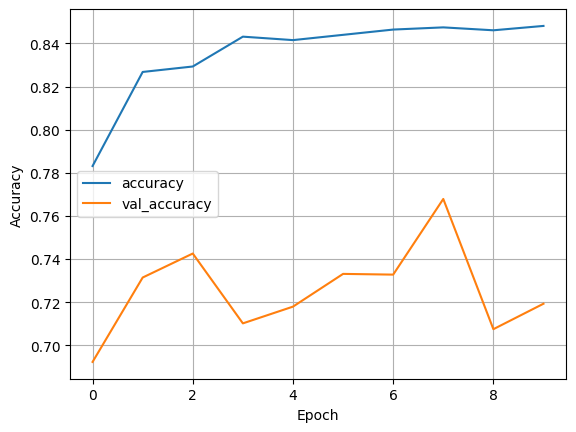

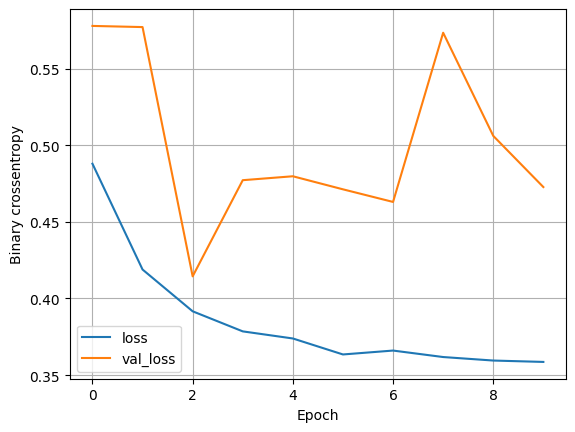

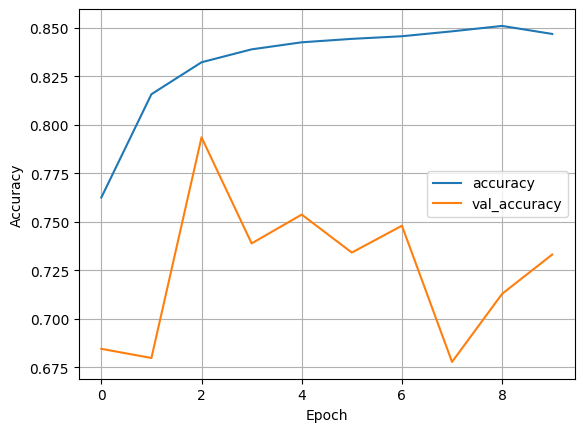

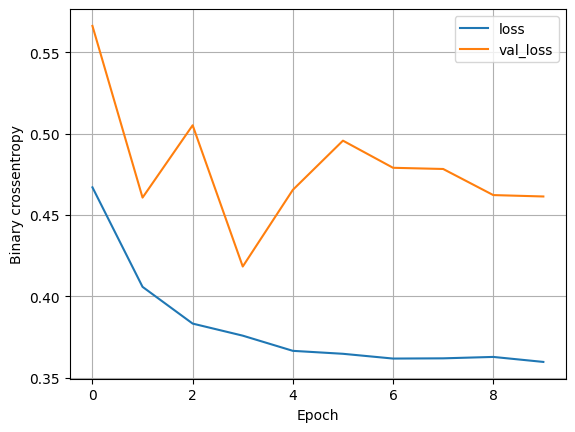

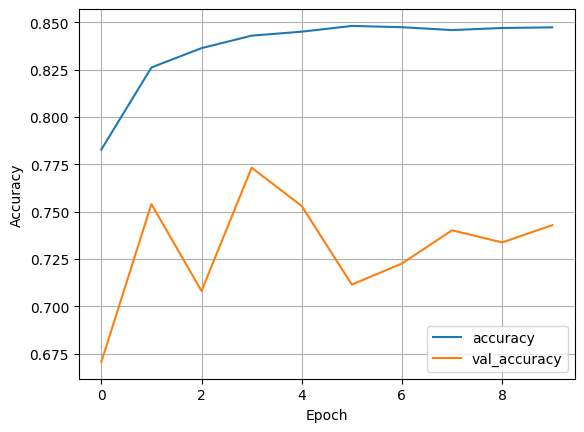

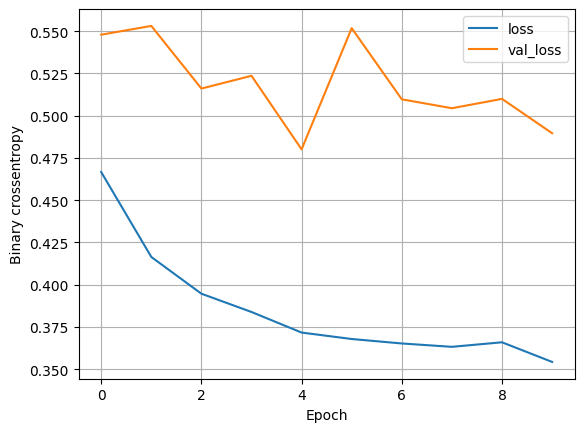

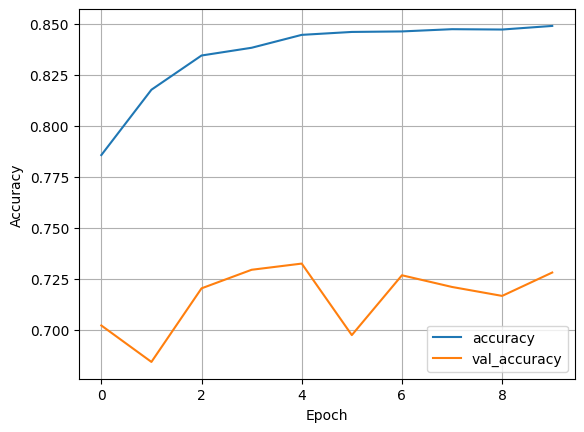

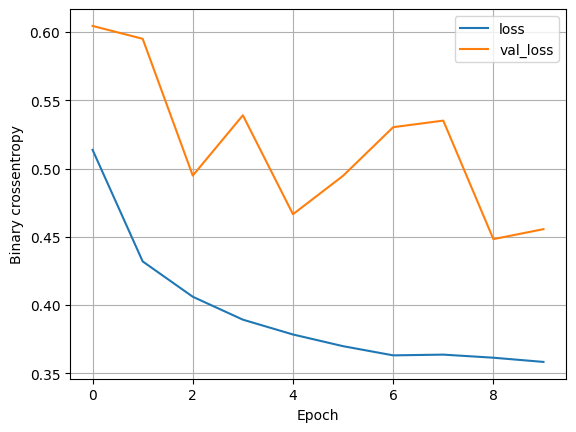

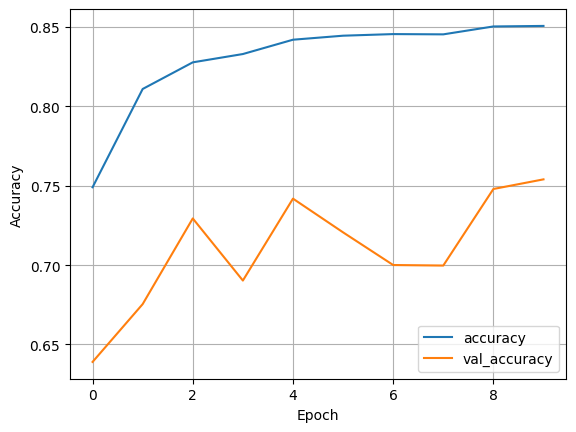

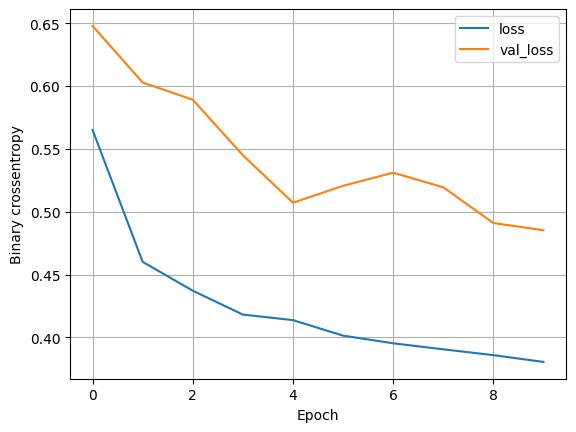

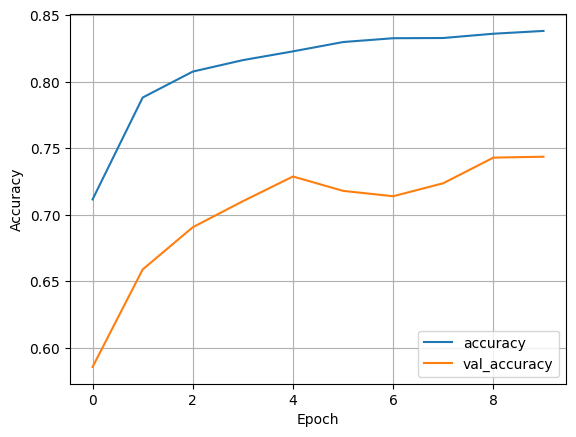

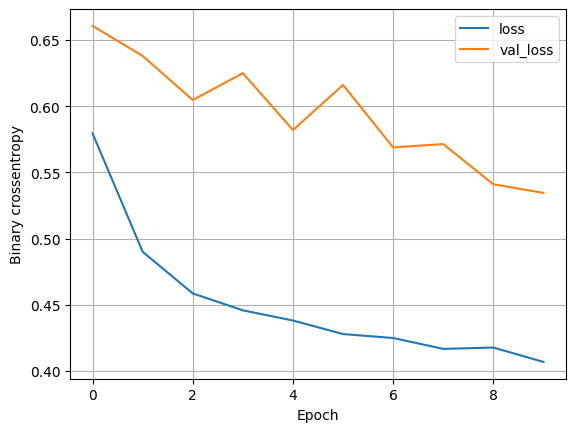

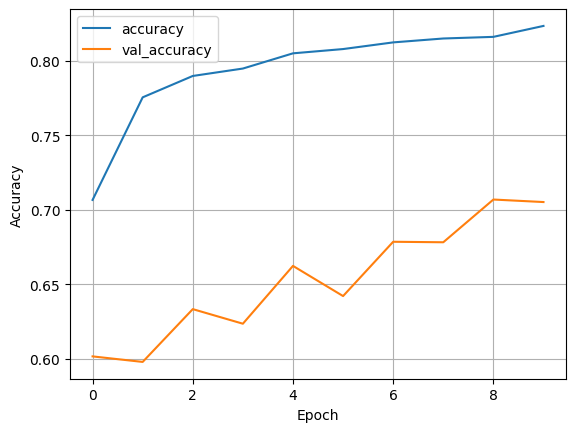

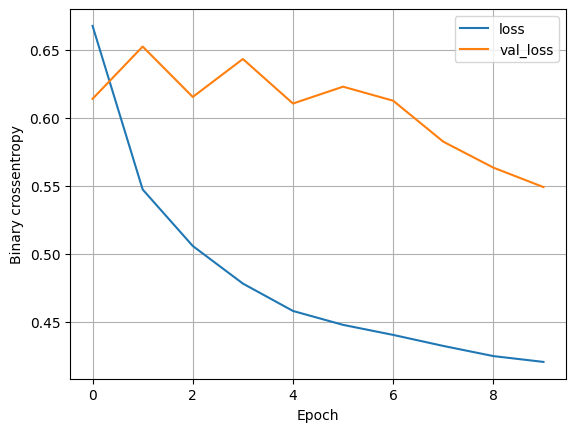

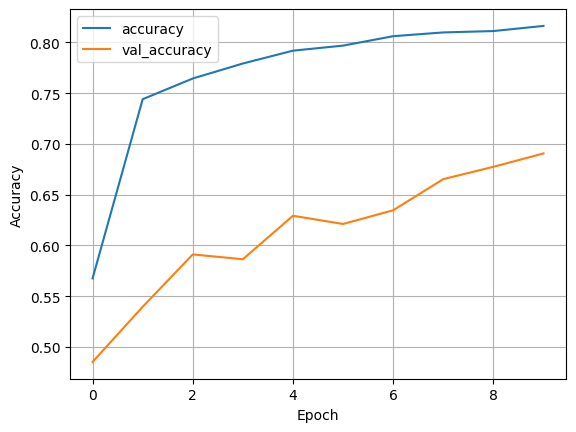

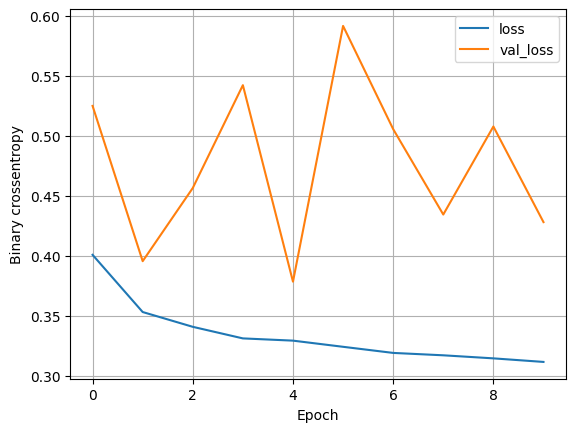

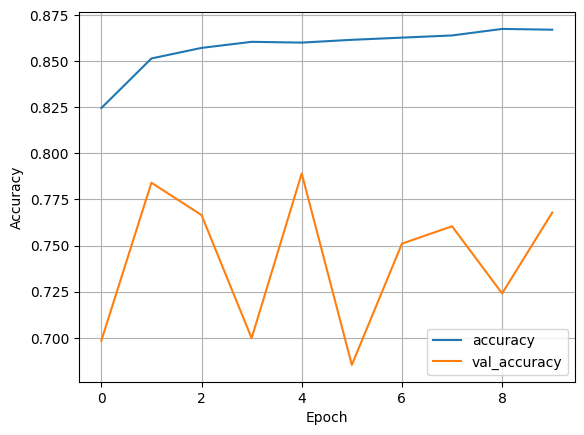

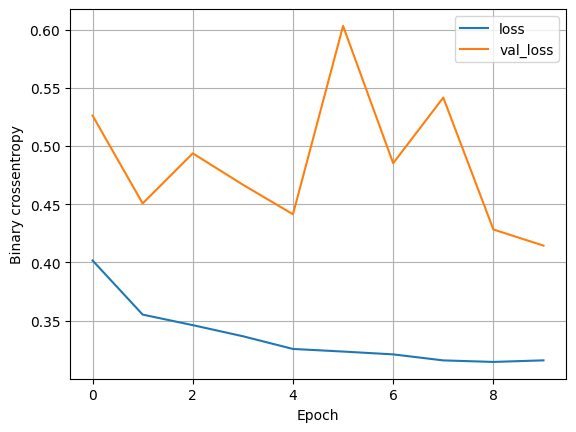

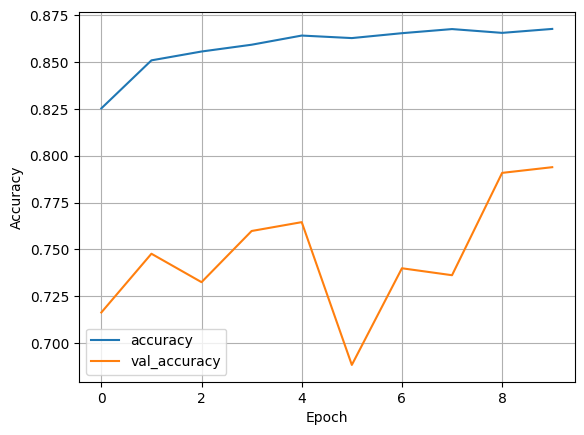

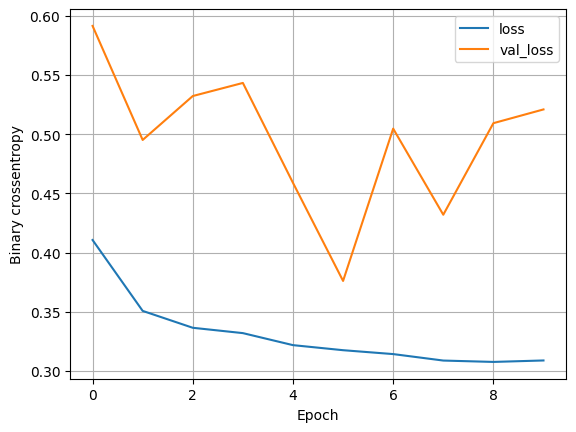

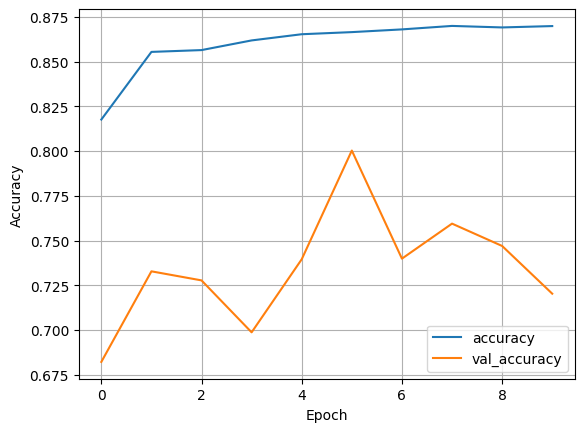

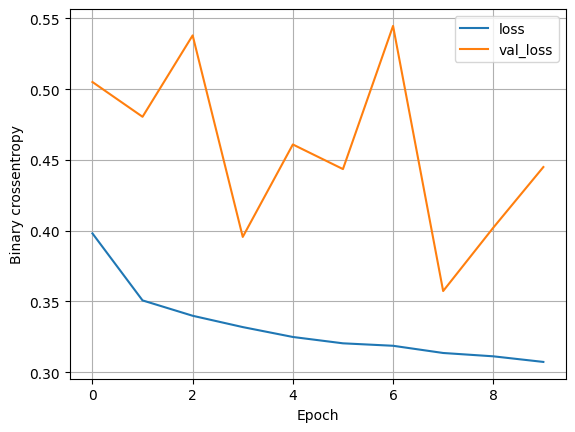

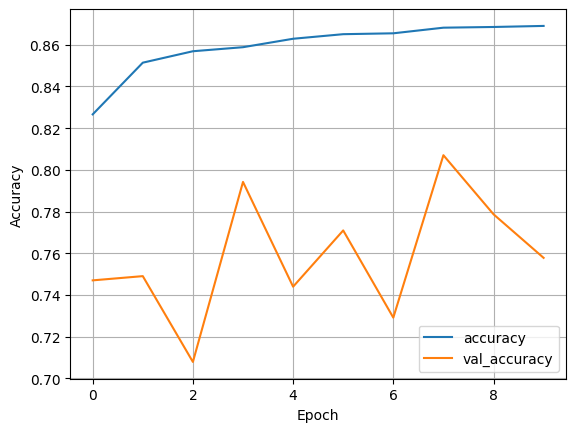

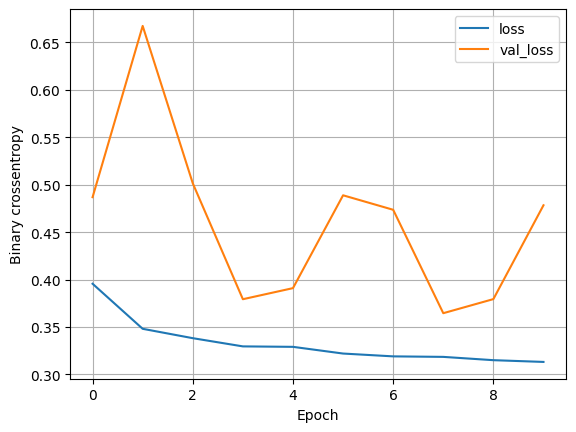

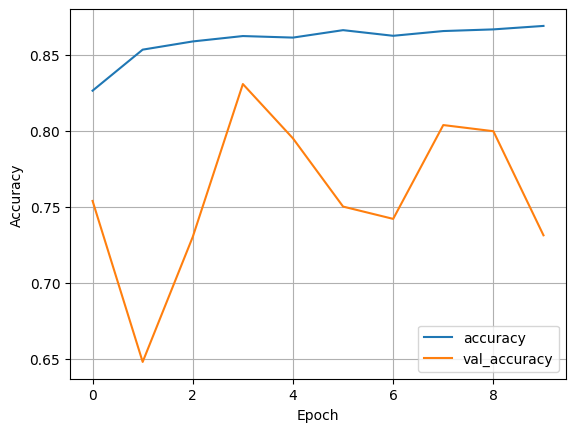

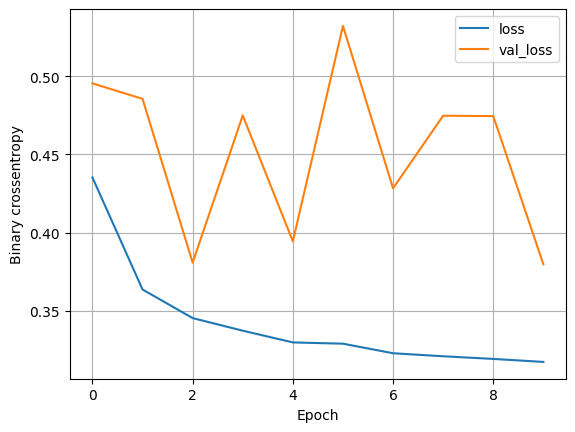

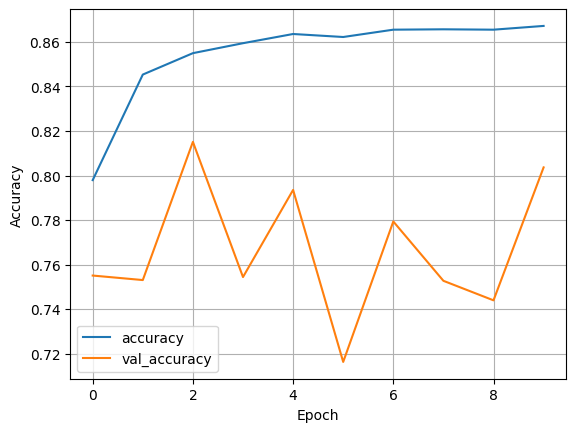

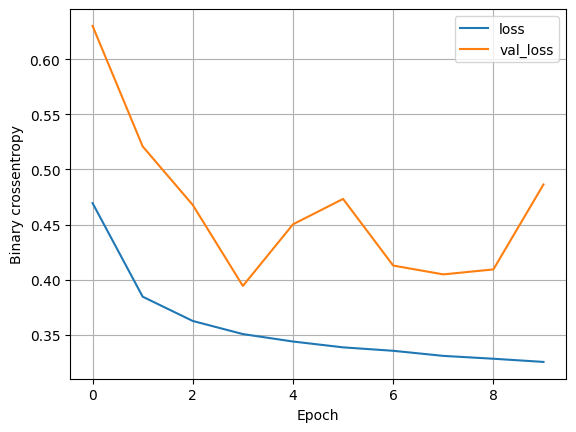

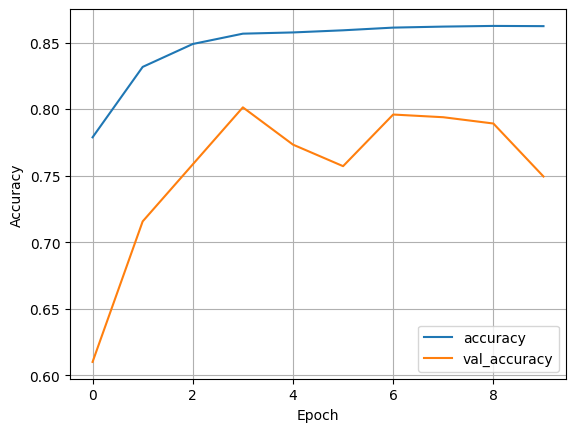

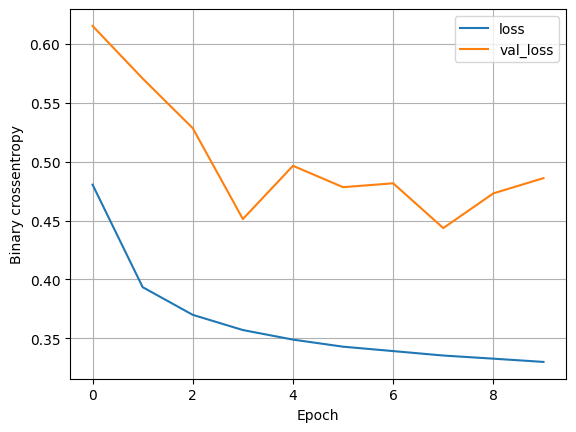

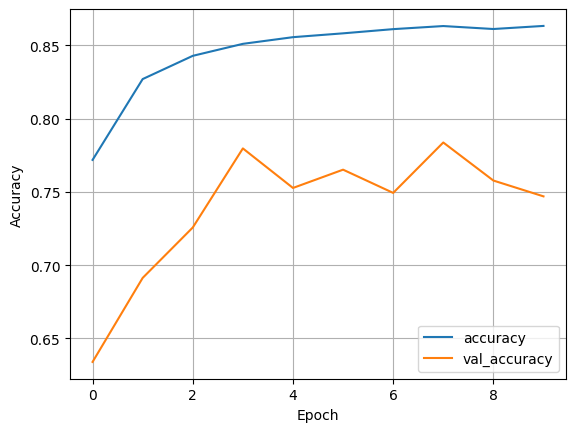

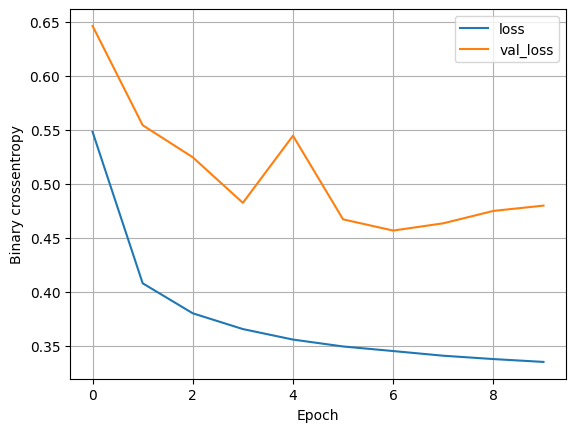

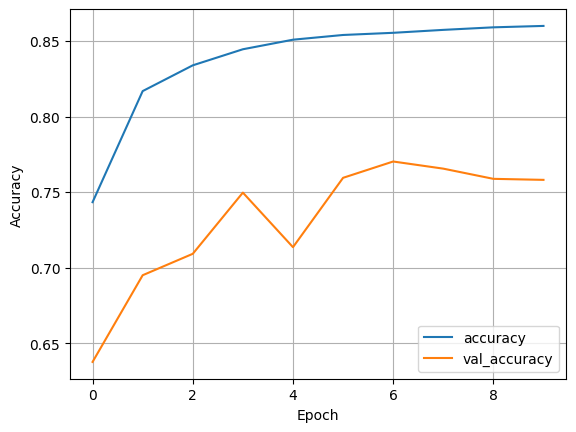

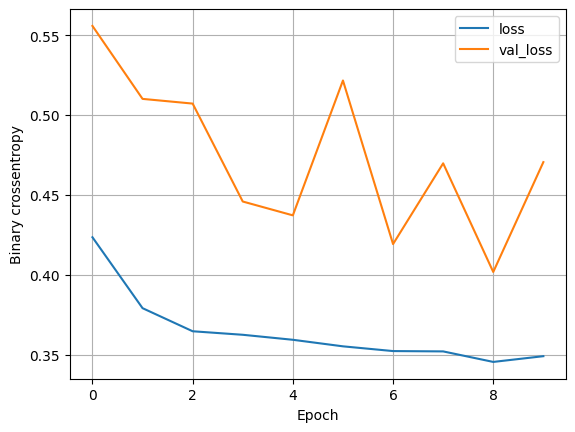

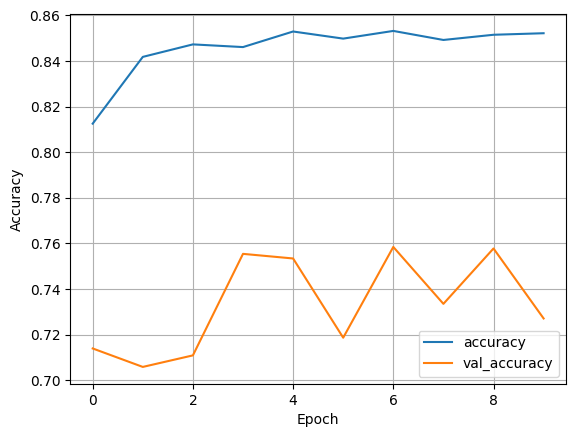

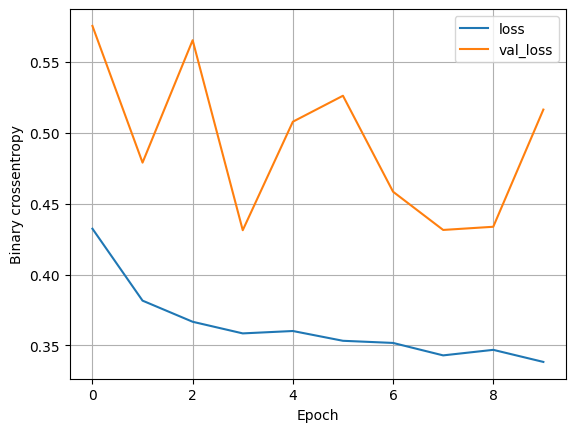

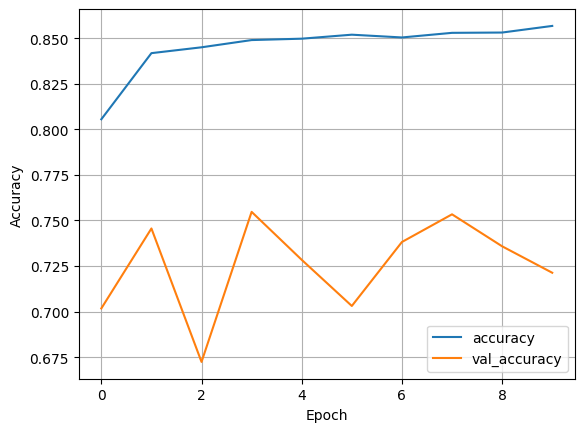

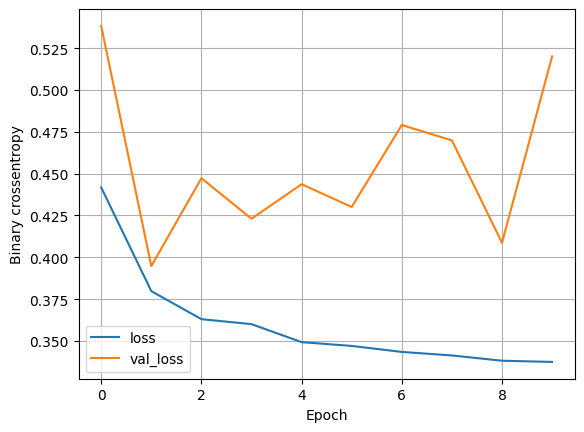

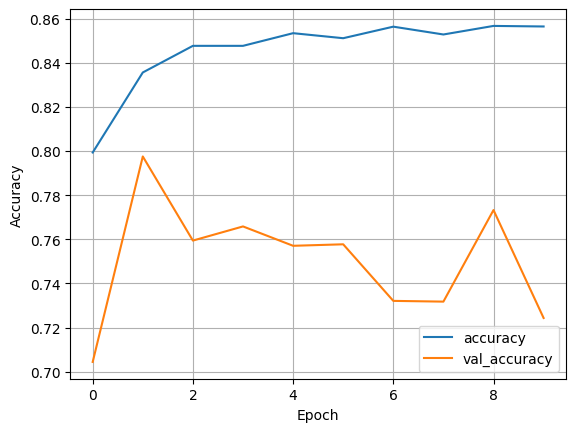

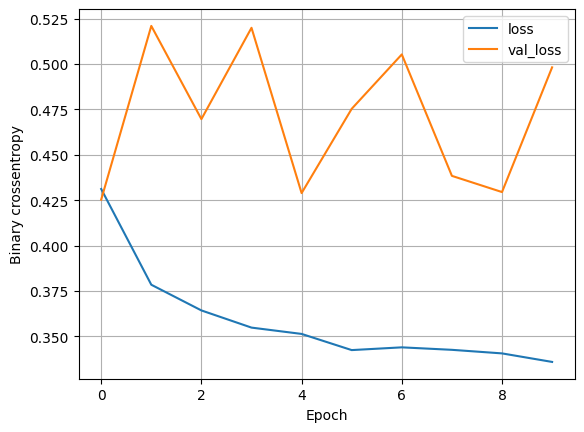

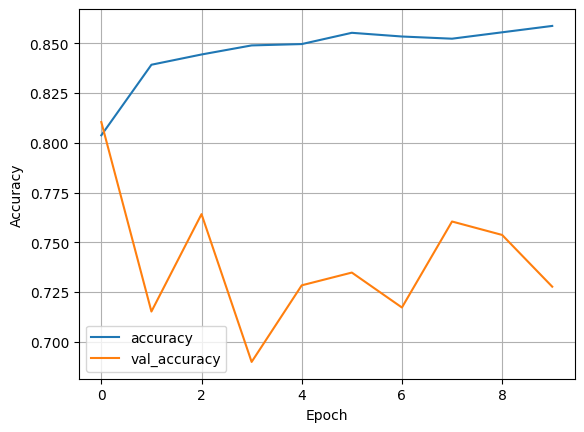

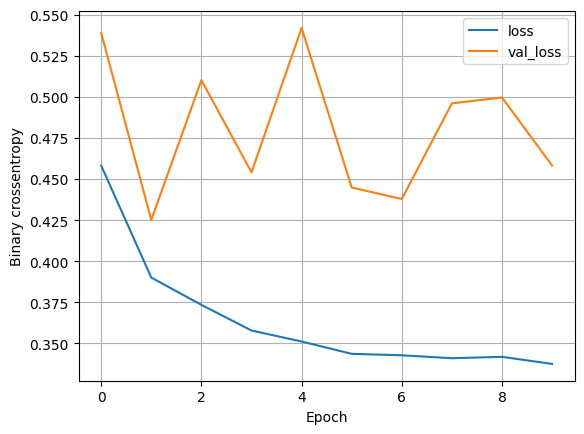

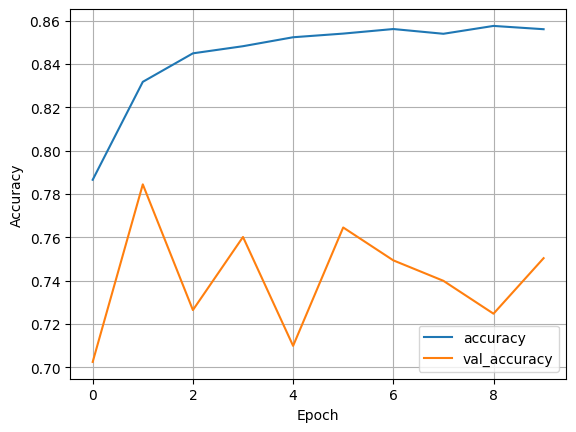

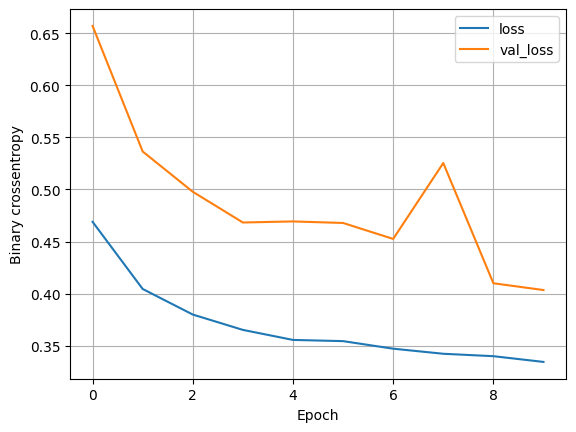

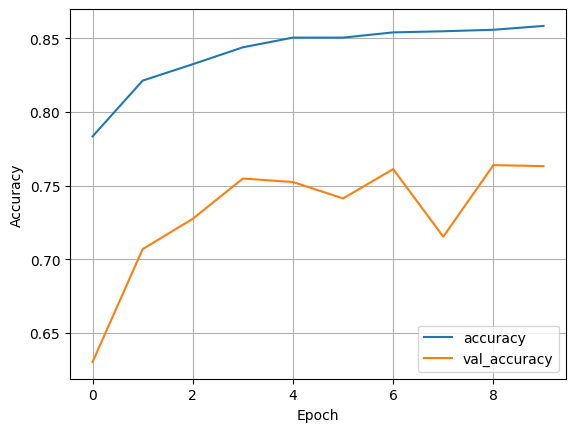

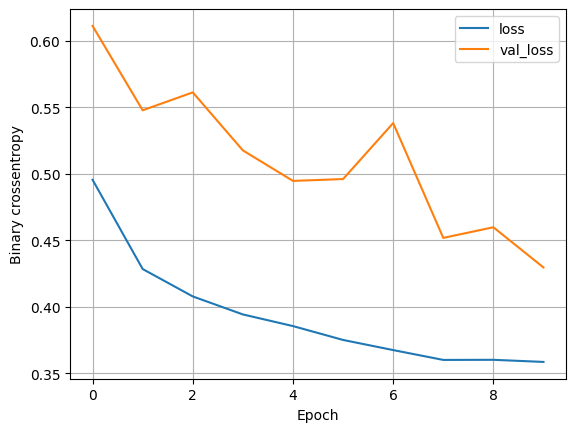

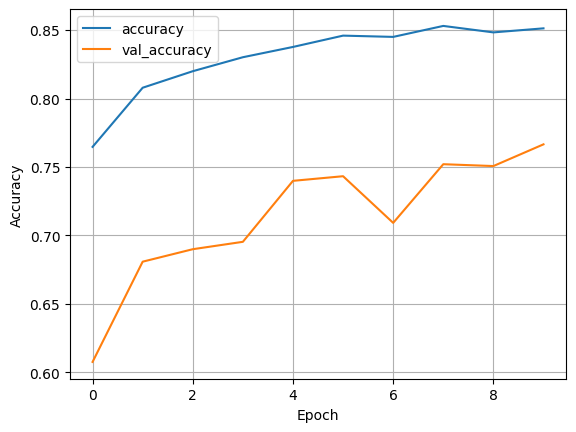

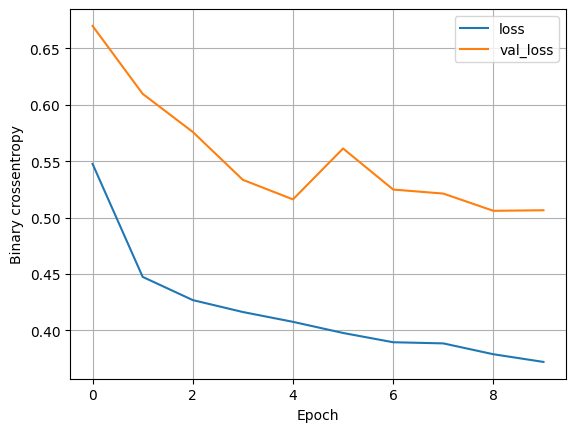

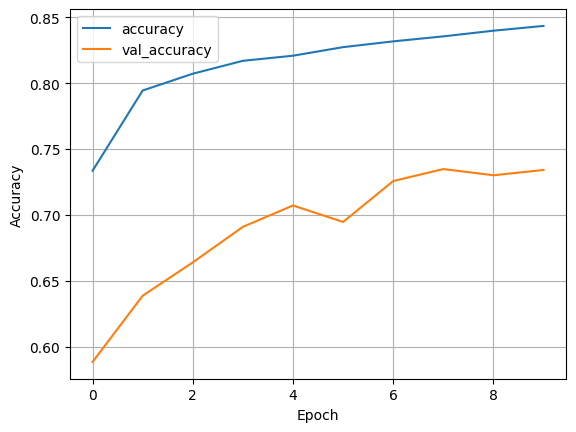

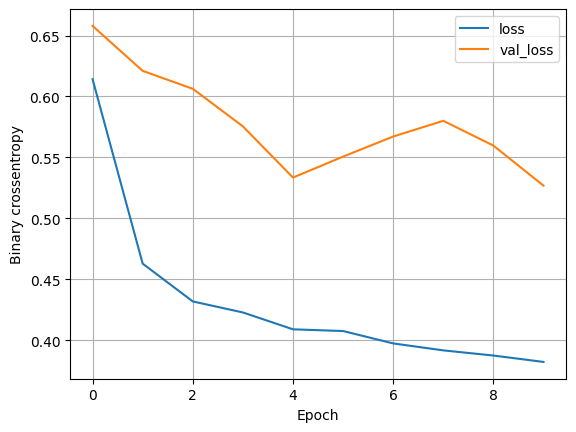

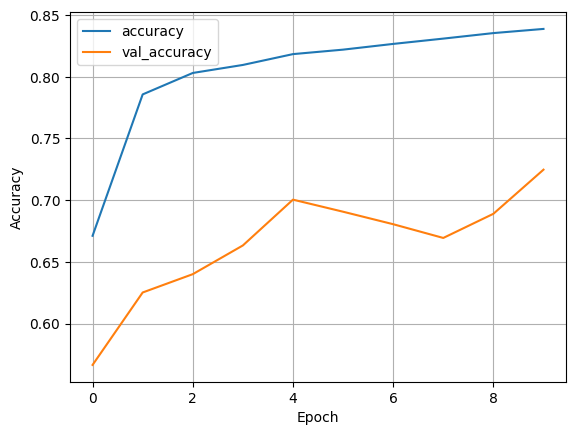

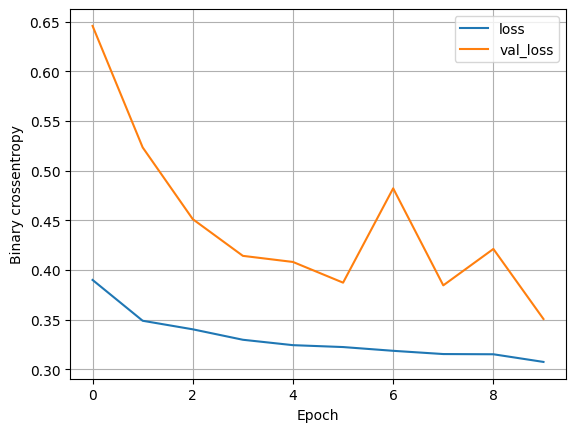

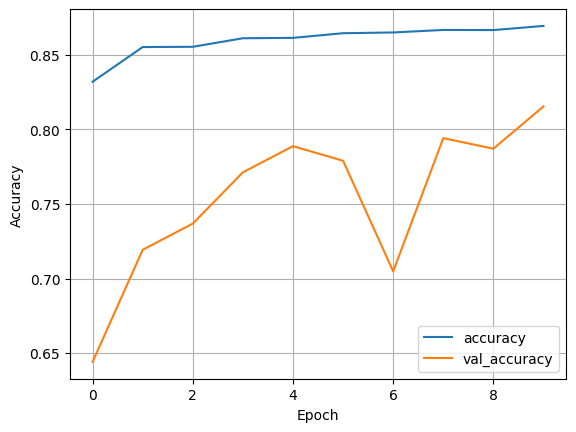

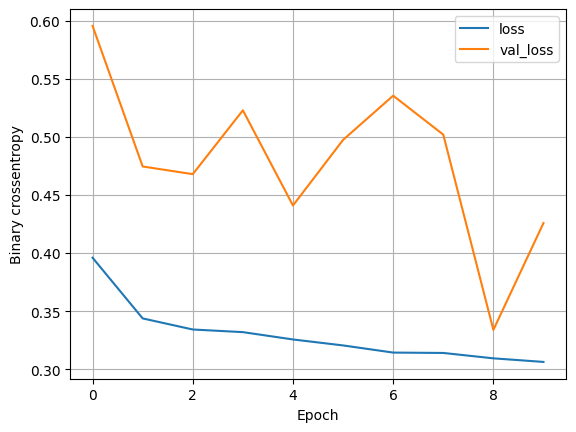

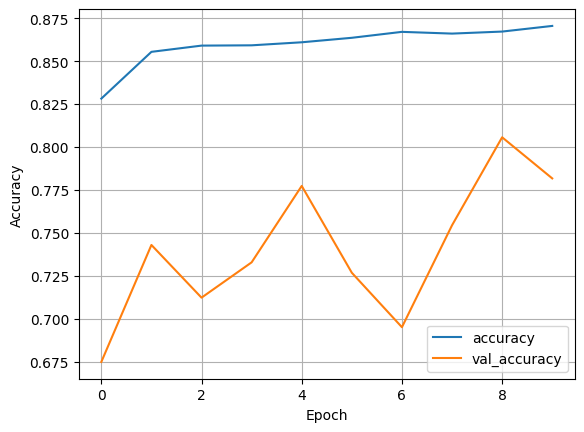

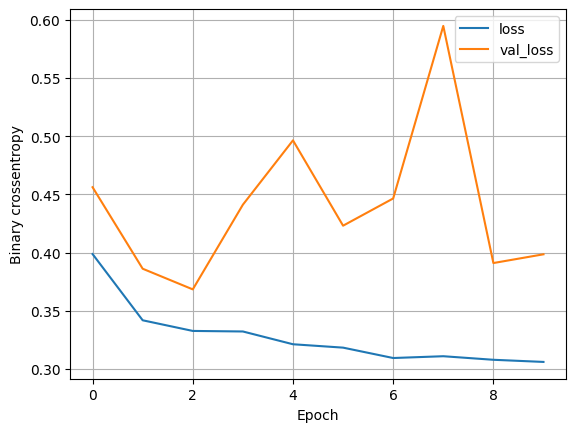

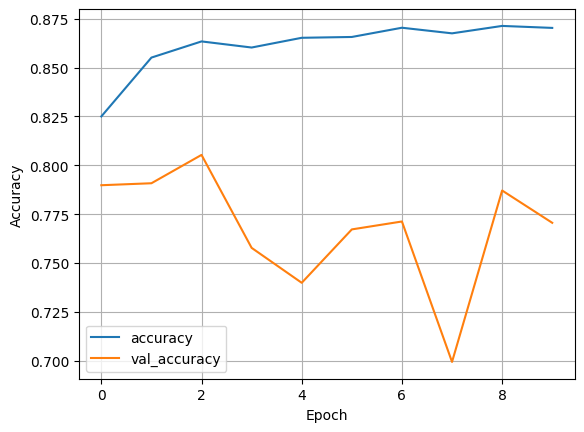

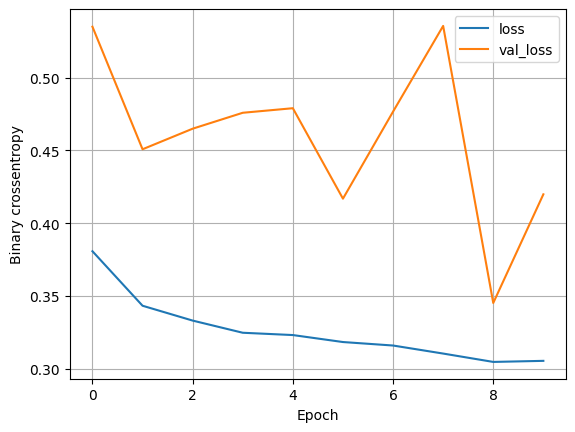

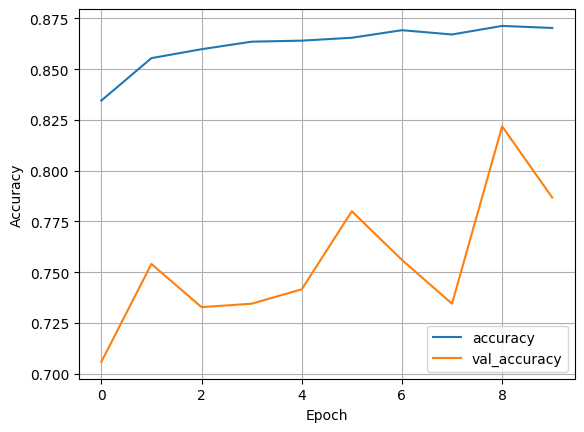

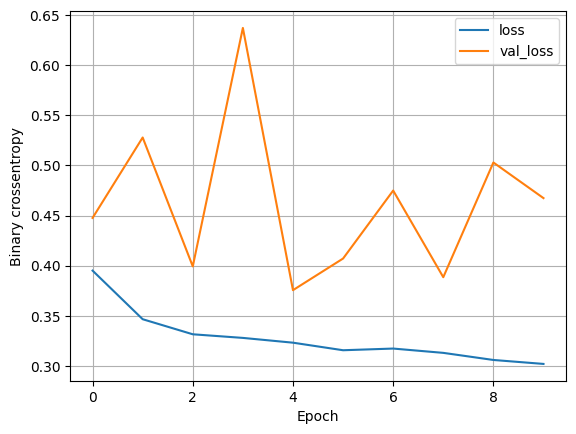

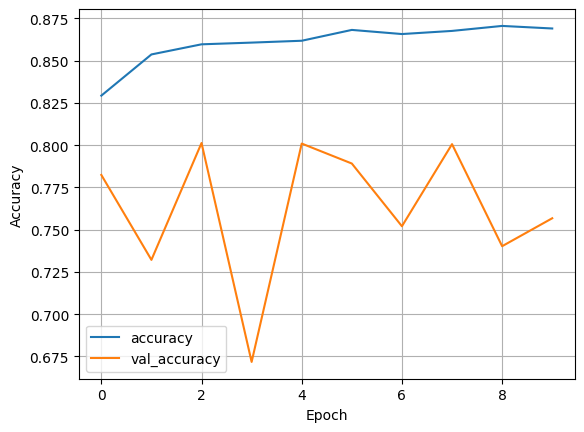

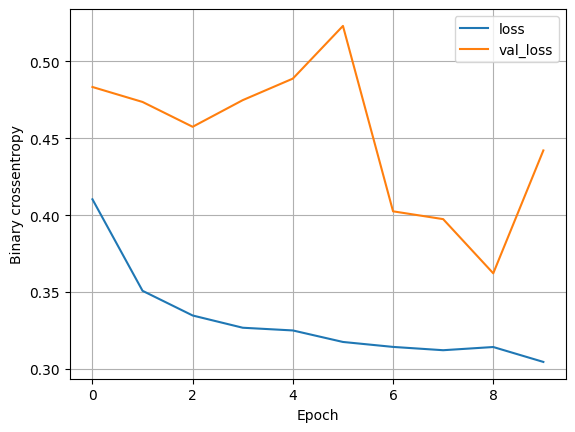

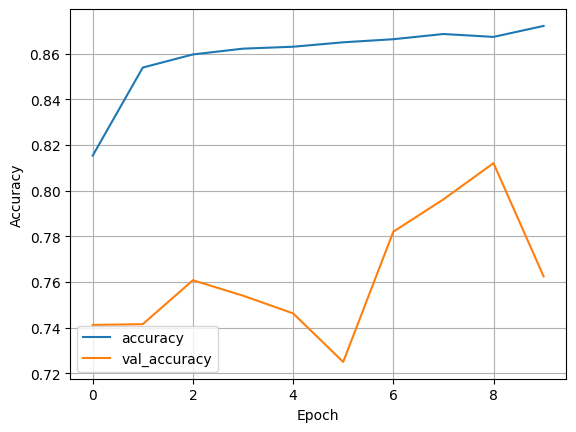

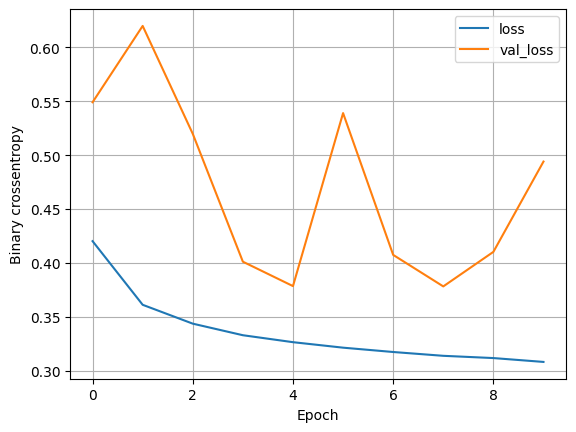

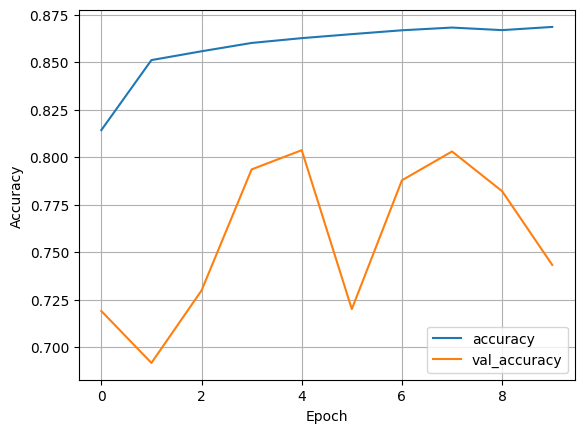

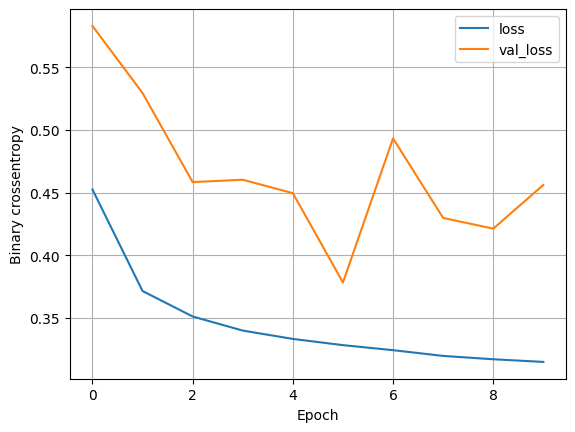

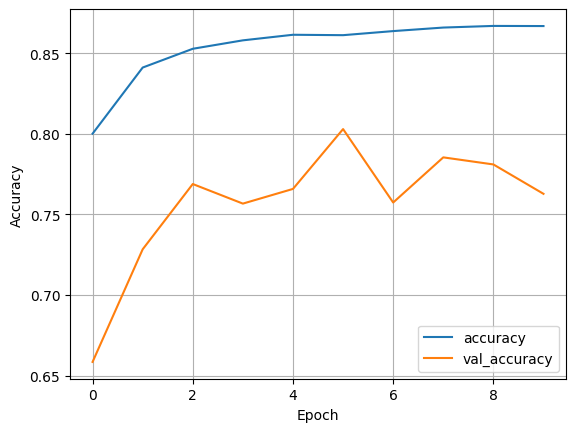

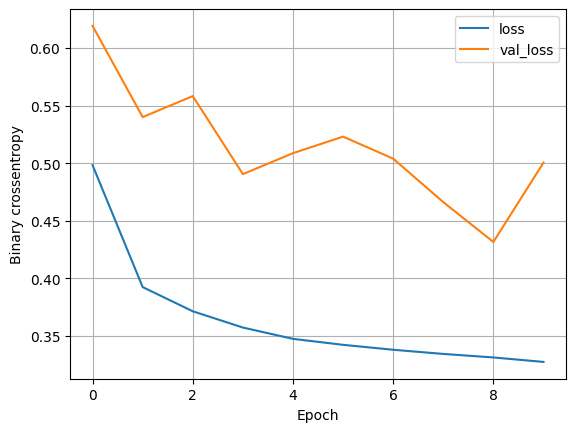

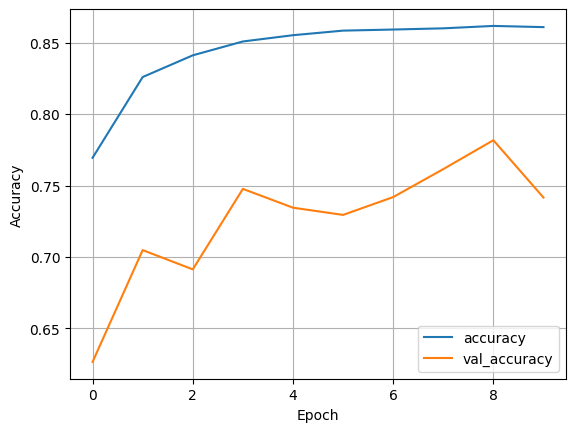

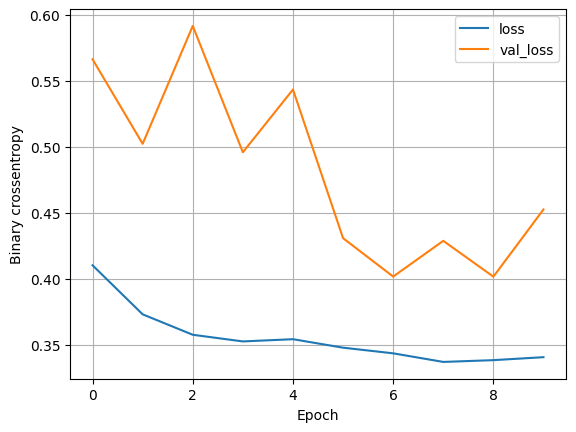

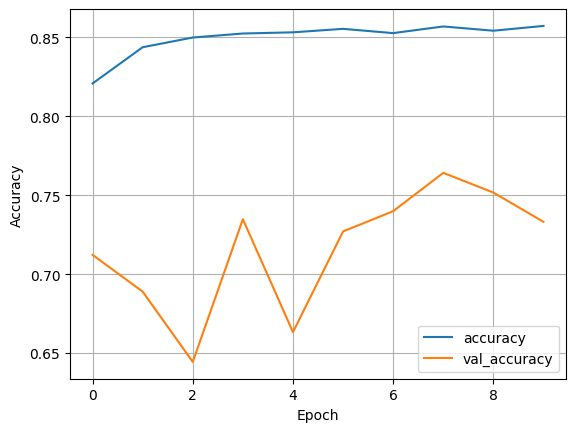

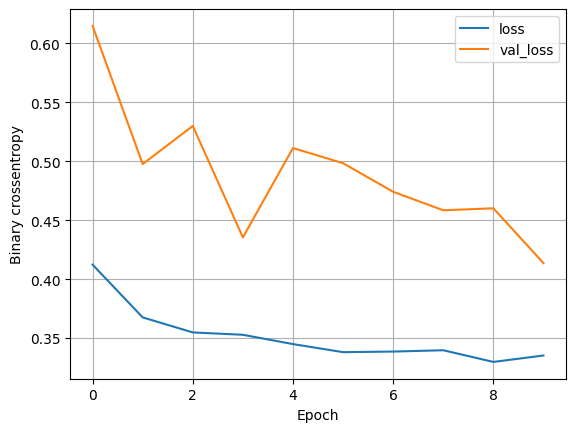

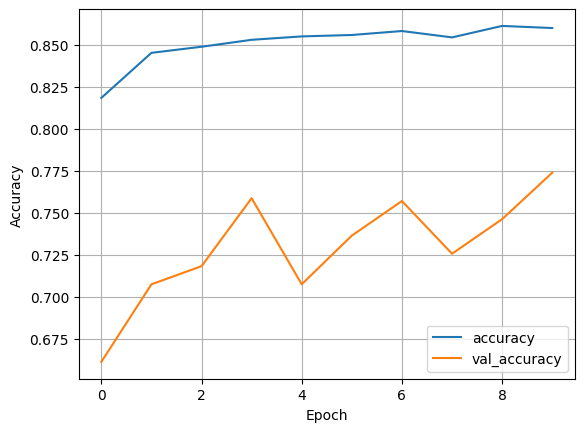

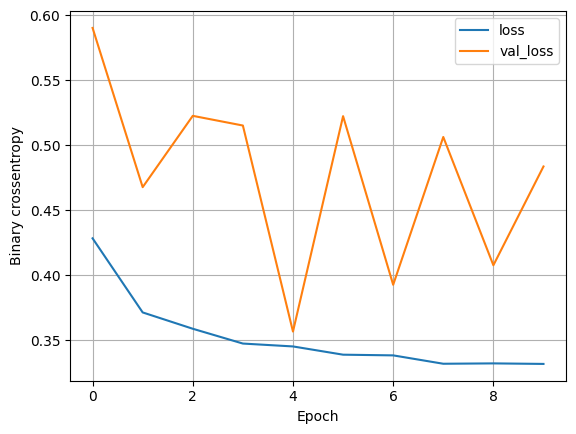

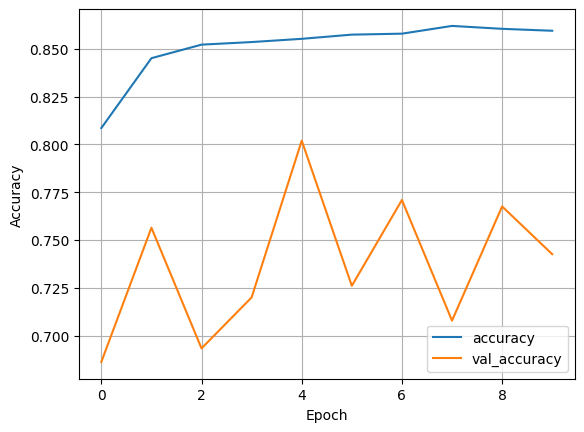

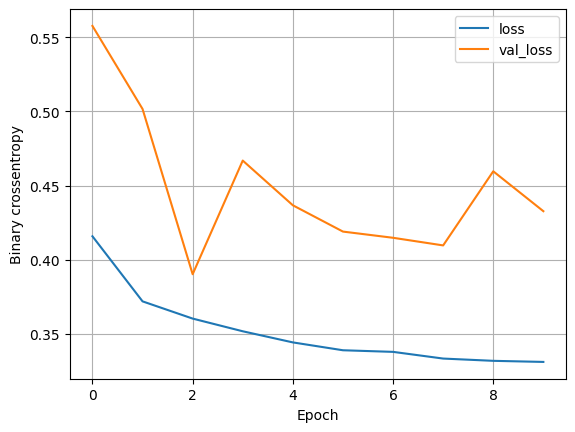

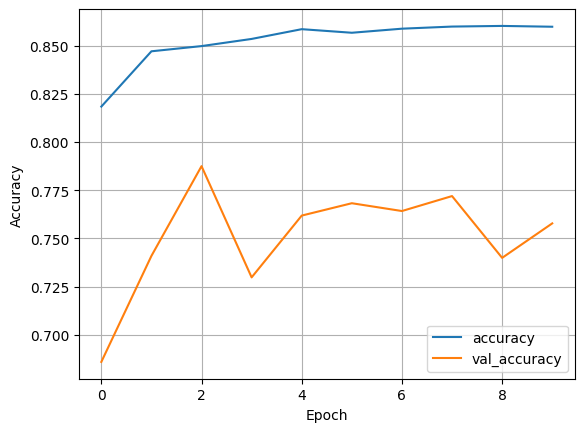

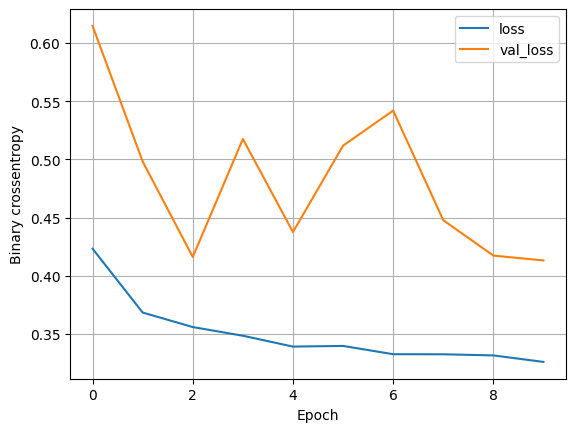

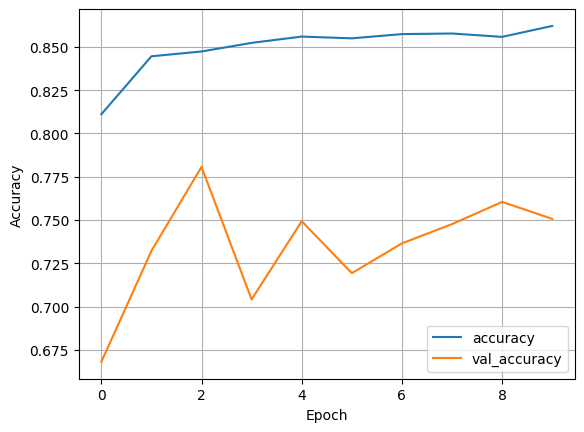

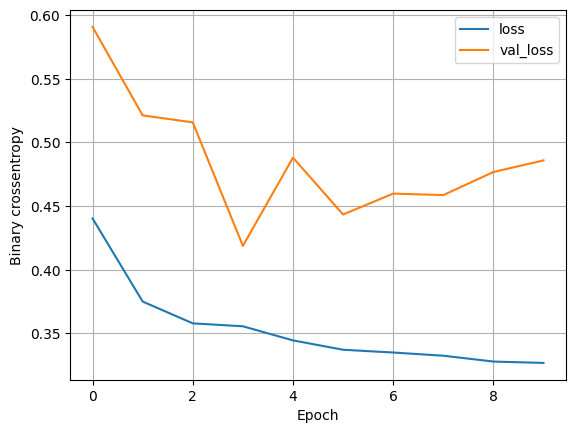

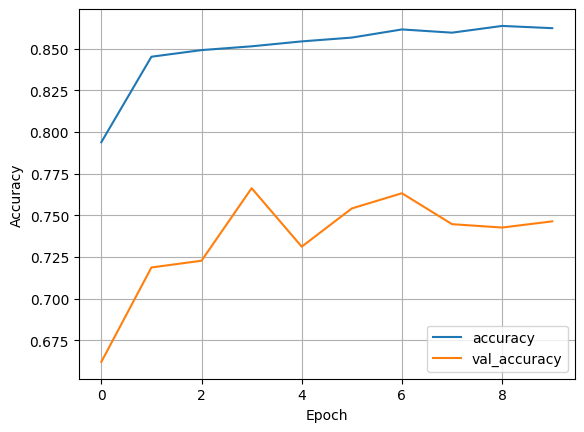

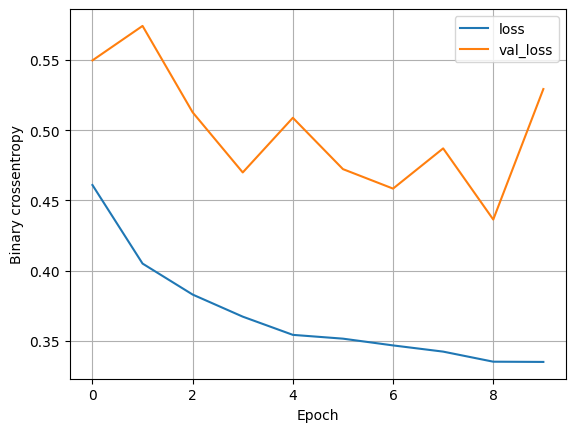

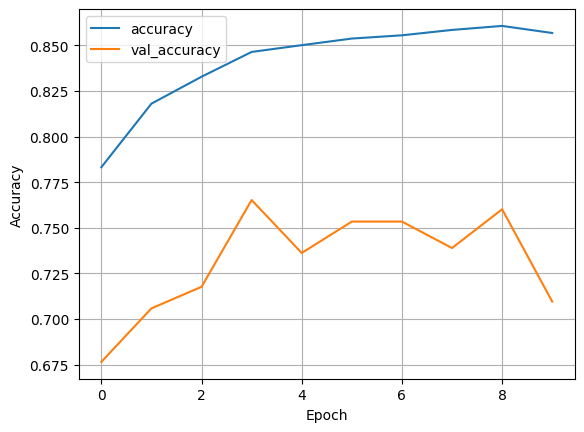

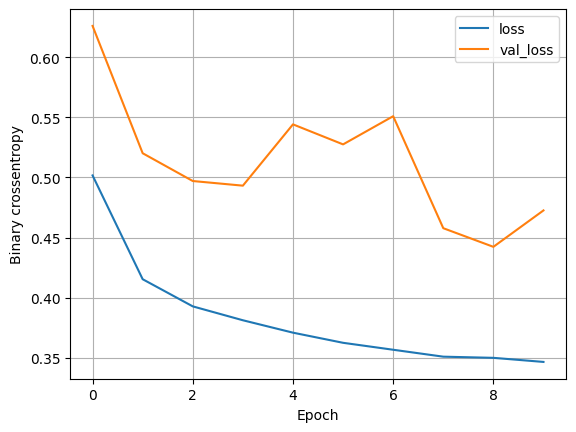

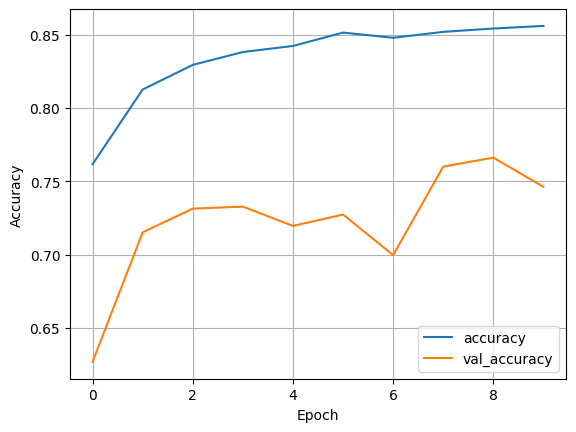

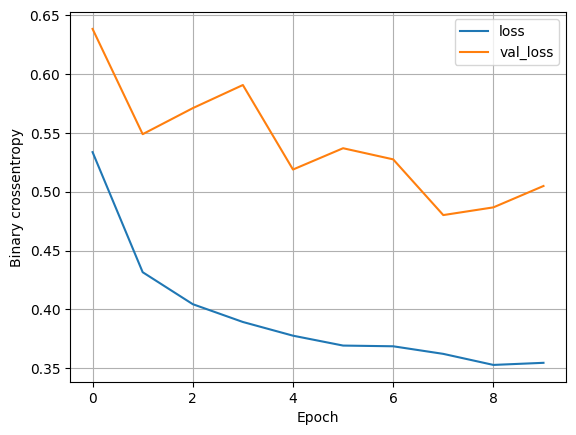

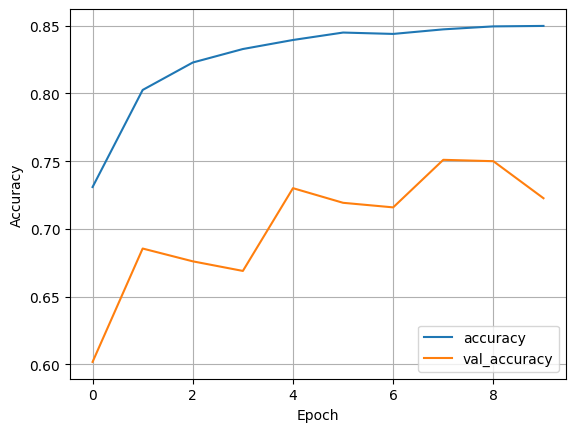

In [ ]:
epochs = 10
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob,lr, batch_size, epochs)
        plot_loss(history)
        plot_accuracy(history)


